In [2]:
import pandas as pd
import shapefile
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from shapely.geometry import Polygon
import numpy as np

In [13]:
leidingtrace=gpd.read_file("C:/Users/20172648/Desktop/aa-en-maas_sewer_shp_WGS84/Leidingtrace_WGS84.shp")
Rioleringsdeelgebied=gpd.read_file("C:/Users/20172648/Desktop/aa-en-maas_sewer_shp_WGS84/Rioleringsdeelgebied_WGS84.shp")
Rioolgemaal=gpd.read_file("C:/Users/20172648/Desktop/aa-en-maas_sewer_shp_WGS84/Rioolgemaal_WGS84.shp")
RWZI=gpd.read_file("C:/Users/20172648/Desktop/aa-en-maas_sewer_shp_WGS84/RWZI_WGS84.shp")
Zuiveringsregio=gpd.read_file("C:/Users/20172648/Desktop/aa-en-maas_sewer_shp_WGS84/Zuiveringsregio_WGS84.shp")

Rioleringsdeelgebied.head()

,RGDIDENT,TYPRGD,NAAMRGD,RGDID,GEOMETRIE_,GEOMETRIE1,geometry
0,CUI-CUI-BEI,1,Beijerd en 't Riet,316,0.0,0.0,"POLYGON ((5.871789942952855 51.73142778398143,..."
1,HEL-HEL-AKI,2,30. Akkers I,792,0.0,0.0,"POLYGON ((5.639777930999652 51.45550664890908,..."
2,HER-ROS-OVE,1,gebied E; Overlaet E,97,0.0,0.0,"POLYGON ((5.369862763101162 51.72400915103489,..."
3,HER-HER-ORP,1,Geb. 8 Orthenpoort,539,0.0,0.0,"POLYGON ((5.303665672444452 51.69769499520089,..."
4,HER-BRA-BRA,2,de Brand,770,0.0,0.0,"POLYGON ((5.366968395013955 51.6833809916705, ..."


In [149]:
rio_db = pd.read_excel("C:/Users/20172648/Desktop/sewer_model/20180717_dump riodat rioleringsdeelgebieden_DB.xlsx", skiprows=9)
list_codes = rio_db['Code'].tolist()
rio_db.head()
# Made a list of the Rioleeringsdeelgebieden we should consider
select_deelgebied = Rioleringsdeelgebied[pd.DataFrame(Rioleringsdeelgebied['RGDIDENT']).isin(list_codes).any(1)]
#selected those areas in our shapefile rioleeringsdeelgebieden with the list from rioleeringsdeelgebied.db
select_deelgebied.head()

,RGDIDENT,TYPRGD,NAAMRGD,RGDID,GEOMETRIE_,GEOMETRIE1,geometry
3,HER-HER-ORP,1,Geb. 8 Orthenpoort,539,0.0,0.0,"POLYGON ((5.303665672444452 51.69769499520089,..."
9,HER-HER-TOL,1,geb. 6c Carolushof,543,0.0,0.0,"POLYGON ((5.305530586673107 51.69227701994136,..."
16,HEU-DRU-WAR,3,Wartsila,297,0.0,0.0,"POLYGON ((5.153577043237233 51.69637533371871,..."
27,HER-HER-SVL,2,Sportpark de Vliert(Sportiom),533,0.0,0.0,"POLYGON ((5.336644695444306 51.70478719903669,..."
31,HER-HER-VUG,1,Geb. 12 Vughterpoort,548,0.0,0.0,"POLYGON ((5.293400572151596 51.67667953896254,..."


In [16]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns
gdf = select_deelgebied
#gdf = gdf.to_crs({'init': 'epsg:28992'})
gdf = gdf.to_crs({'init': 'epsg:4326'})

gdf['x'] = gdf.centroid.x
gdf['y'] = gdf.centroid.y
gdf.head()
#Made the coordinates readable and plotted the shapefile
#gdf['geometry'][3]

,RGDIDENT,TYPRGD,NAAMRGD,RGDID,GEOMETRIE_,GEOMETRIE1,geometry,x,y
3,HER-HER-ORP,1,Geb. 8 Orthenpoort,539,0.0,0.0,"POLYGON ((5.303665672444452 51.69769499520089,...",5.301593,51.699136
9,HER-HER-TOL,1,geb. 6c Carolushof,543,0.0,0.0,"POLYGON ((5.305530586673107 51.69227701994136,...",5.303842,51.692047
16,HEU-DRU-WAR,3,Wartsila,297,0.0,0.0,"POLYGON ((5.153577043237233 51.69637533371871,...",5.150843,51.694462
27,HER-HER-SVL,2,Sportpark de Vliert(Sportiom),533,0.0,0.0,"POLYGON ((5.336644695444306 51.70478719903669,...",5.329350,51.701318
31,HER-HER-VUG,1,Geb. 12 Vughterpoort,548,0.0,0.0,"POLYGON ((5.293400572151597 51.67667953896254,...",5.292908,51.679716


## Now we make a grid for each point but this might cluster up

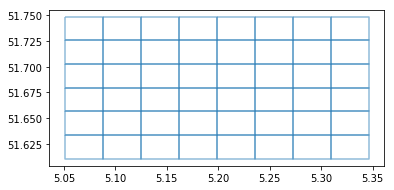

In [186]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
points = gdf

xmin,ymin,xmax,ymax = points['geometry'].total_bounds
# length and wide are equal to the size of a grid box in the 2d array of the KNMI data.
length = 0.023000000000
wide = 0.037000000000
# start is min int, end max int and step is wide/length (floats here)
cols = list(np.arange(float(5.0505), float(5.3465), wide)) 
rows = list(np.arange(float(51.6335), float(51.7485), length))
rows.reverse() # just reverses rows
#Added numbers here to make sure the lines and grids coincide with actual latitude/longitude lines
polygons = []
for x in cols:
    for y in rows:
        polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y-length), (x, y-length)]))

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("grid_coordinates_moved.shp")
r = gpd.read_file("grid_coordinates_moved.shp")
#r = r.to_crs({'init': 'epsg:4326'})

r.boundary.plot(alpha=0.5)

Populating the interactive namespace from numpy and matplotlib


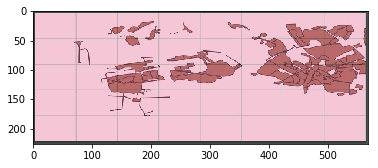

In [44]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img2=mpimg.imread('QGIS GRID.png')
imgplot = plt.imshow(img2)
plt.show()

In [95]:
intersection=gpd.read_file("final_intersection.shp")
hist_rain_total = pd.read_csv('rain_timeseries/rainfall_ts_combined.csv', sep=',')
intersection # FID here tells us which cell to use from the knmi data/grid starting at 0 and 
#ending at 47 (6x8 cells)

# so from here?
# eventually we need rain for each area per minute
# turn the knmi df into a list?
# for each item in the list (the index will correspond to FID) add a column called rainfall mm
# then do that x area and eventually merge the same area's (rows)
intersection

,RGDIDENT,TYPRGD,NAAMRGD,RGDID,GEOMETRIE_,GEOMETRIE1,FID,Area,geometry
0,HER-HER-ORP,1,Geb. 8 Orthenpoort,539,0.0,0.0,38,190095.706,"POLYGON ((5.303665672444452 51.69769499520089,..."
1,HER-HER-TOL,1,geb. 6c Carolushof,543,0.0,0.0,38,28559.526,"POLYGON ((5.305530586673107 51.69227701994136,..."
2,HEU-DRU-WAR,3,Wartsila,297,0.0,0.0,14,161710.799,"POLYGON ((5.153577043237233 51.69637533371871,..."
3,HER-HER-SVL,2,Sportpark de Vliert(Sportiom),533,0.0,0.0,43,62935.683,"POLYGON ((5.336644695444306 51.70478719903669,..."
4,HER-HER-SVL,2,Sportpark de Vliert(Sportiom),533,0.0,0.0,44,244851.275,"POLYGON ((5.334575818382014 51.70250000000001,..."
5,HER-HER-VUG,1,Geb. 12 Vughterpoort,548,0.0,0.0,38,72824.299,"POLYGON ((5.291375718355411 51.6795, 5.2910322..."
6,HER-HER-VUG,1,Geb. 12 Vughterpoort,548,0.0,0.0,39,53066.634,"POLYGON ((5.293400572151596 51.67667953896254,..."
7,HEU-HEU-VES,1,Heusden-vesting,278,0.0,0.0,12,243660.771,"POLYGON ((5.141644869056854 51.73574277360353,..."
8,HEU-HED-KER,1,Hedikhuizen,282,0.0,0.0,18,161324.282,"POLYGON ((5.188199653908566 51.73365504549434,..."
9,HER-HER-NIE,1,Geb.20 Schutskamp / Nieuw Deuteren,566,0.0,0.0,32,462421.888,"POLYGON ((5.2725 51.6876622112632, 5.272422805..."


In [225]:
hist_rain_total

,measurement_begin,measurement_end,interval,location,rainfall,date,hour,month,day,code,location_core,area,pump_station
0,2018-05-31T22:00:00Z,2018-05-31T22:05:00Z,5,Geb. 15 Veemarktkwartier NW.,0.0000,2018-05-31,22,5,31,HER-HER-VEE,Hertogenbosch (Oude Engelenseweg),3.708121e+05,oude_engelseweg
1,2018-05-31T22:00:00Z,2018-05-31T22:05:00Z,5,Geb. 11 Orthen/Ertveld,0.0000,2018-05-31,22,5,31,HER-HER-ORT,Hertogenbosch (Oude Engelenseweg),3.637667e+05,oude_engelseweg
2,2018-05-31T22:00:00Z,2018-05-31T22:05:00Z,5,Sportpark de Vliert(Sportiom),0.0000,2018-05-31,22,5,31,HER-HER-SVL,Hertogenbosch (Oude Engelenseweg),3.077690e+05,oude_engelseweg
3,2018-05-31T22:00:00Z,2018-05-31T22:05:00Z,5,Kastanjelaan,0.0000,2018-05-31,22,5,31,HEU-DRU-KAS,Drunen (Stationsstraat),2.906466e+05,haarsteeg
4,2018-05-31T22:00:00Z,2018-05-31T22:05:00Z,5,Groenewoud,0.0000,2018-05-31,22,5,31,HEU-DRU-GRO,Drunen,3.025266e+05,haarsteeg
5,2018-05-31T22:00:00Z,2018-05-31T22:05:00Z,5,Groenewoud,0.0000,2018-05-31,22,5,31,HEU-LUT-GRO,Luttelherpt,1.044425e+03,haarsteeg
6,2018-05-31T22:00:00Z,2018-05-31T22:05:00Z,5,Woonwagencentrum,0.0000,2018-05-31,22,5,31,HER-HER-WWC,Hertogenbosch (Helftheuvelweg),5.961574e+04,helftheuvelweg
7,2018-05-31T22:00:00Z,2018-05-31T22:05:00Z,5,Woonwagencentrum,0.0000,2018-05-31,22,5,31,HEU-DRU-WWC,Drunen,6.562743e+03,haarsteeg
8,2018-05-31T22:00:00Z,2018-05-31T22:05:00Z,5,Station-Oost,0.0000,2018-05-31,22,5,31,HER-HER-STO,Hertogenbosch (Rompert),6.233705e+04,de_rompert
9,2018-05-31T22:00:00Z,2018-05-31T22:05:00Z,5,Geb. 21 Kruiskamp,0.0000,2018-05-31,22,5,31,HER-HER-KRU,Hertogenbosch (Helftheuvelweg),1.195900e+06,helftheuvelweg


# Ceaning ASC FILE (removing spaces, dead columns, adding index) and saving as CSV

In [218]:
#opening an .asc file as 2d array
array2D = []
file = 'rain_grid_prediction/Knmi.Harmonie_99.0.1.61.105_2019-04-06T00h00m00s_2019-04-07T02h00m00s_2019-04-07T03h00m00s.asc'
with open(file) as f:
    for line in f.readlines()[7:]:
            array2D.append(line.split(' '))

#load array into a dataframe, string values in each cell
knmi = pd.DataFrame(array2D)

# clean the file, remove spaces, and add longitutde and latitude as index and column names
knmi = knmi.drop(knmi.columns[0], axis = 1)
knmi.columns = np.arange(-0.018500000000, 11.0815, 0.037)

# good amount of columns (300)
knmi = knmi.replace('\n',' ', regex=True) 
latitude = np.arange(49.0115, 55.9115, 0.023)
latitude_index = latitude[::-1]
knmi = knmi.set_index(latitude_index)

#right amount of columns now lets select the the longitutde and latitude we need!
knmi = knmi.loc[:, 5.0405:5.3105]
knmi = knmi.loc[51.7486:51.625]
# Negative values are errors in data, changing data to floats and setting negatives to 0
knmi = knmi.astype(float)
knmi = knmi[knmi >= 0]
knmi.fillna(0, inplace=True)

#now lets make a list of all the values, indexed from 0-47 which corresponds to intersection['FID']
# intersection['FID'] also is indexed 0-47
r = []
shape = list(knmi.shape)
for row in range(0,shape[0]):
    for col in range(0, shape[1]):
        r.append(float(knmi.iloc[row,col]))

['rain',
 'grid',
 'prediction/Knmi.Harmonie',
 '99.0.1.61.105',
 '2019-04-06T00h00m00s',
 '2019-04-07T02h00m00s',
 '2019-04-07T03h00m00s.asc']

In [232]:
#making a list of rainfall per area, problem right now is to link them to the correct code
timestamps = file.split("_")
eind = timestamps[-1]
eind = eind[:-4]
begin = timestamps[-2]
rainfall = []
rgdident = []
naamrgd = []
measurement_begin = []
measurement_eind = []
for i in intersection['RGDIDENT'].unique():
    subset = intersection[intersection['RGDIDENT']== i] #make a subset df for each unique area code
    total = 0
    for index, row in subset.iterrows():
        ID = row['FID']
        x = row['Area'] * r[ID]/1000 # times the corresponding cell from knmi rainfall predictions
        code = row['RGDIDENT']
        total = total + x # total rain for the area
    rainfall.append(total)
    rgdident.append(i)
    naamrgd.append(subset['NAAMRGD'].unique())
    measurement_begin.append(begin)
    measurement_eind.append(eind)
dict_df = {"Rainfall": rainfall, "RGDIDENT": rgdident, "NAAMRGD": naamrgd, 'measurement_begin': measurement_begin, "measurement_eind": measurement_eind}
knmi_df_new = pd.DataFrame(data=dict_df)
knmi_df_new
# DataFrame cols:
# rainfall, rgdident, NAAMRGD, start timestamp, end timestamp


,Rainfall,RGDIDENT,NAAMRGD,measurement_begin,measurement_eind
0,0.092820,HER-HER-ORP,[Geb. 8 Orthenpoort],2019-04-07T02h00m00s,2019-04-07T03h00m00s
1,0.013945,HER-HER-TOL,[geb. 6c Carolushof],2019-04-07T02h00m00s,2019-04-07T03h00m00s
2,0.078960,HEU-DRU-WAR,[Wartsila],2019-04-07T02h00m00s,2019-04-07T03h00m00s
3,0.119556,HER-HER-SVL,[Sportpark de Vliert(Sportiom)],2019-04-07T02h00m00s,2019-04-07T03h00m00s
4,0.087382,HER-HER-VUG,[Geb. 12 Vughterpoort],2019-04-07T02h00m00s,2019-04-07T03h00m00s
5,0.000000,HEU-HEU-VES,[Heusden-vesting],2019-04-07T02h00m00s,2019-04-07T03h00m00s
6,0.000000,HEU-HED-KER,[Hedikhuizen],2019-04-07T02h00m00s,2019-04-07T03h00m00s
7,0.110342,HER-HER-NIE,[Geb.20 Schutskamp / Nieuw Deuteren],2019-04-07T02h00m00s,2019-04-07T03h00m00s
8,0.130400,HER-HER-ODE,[Geb. 19 Deuteren],2019-04-07T02h00m00s,2019-04-07T03h00m00s
9,0.007348,HER-HER-HDI,[Geb. 6a Redemptoristenpad A],2019-04-07T02h00m00s,2019-04-07T03h00m00s


# Attempt to turn every file to a csv

In [167]:
#attempt to make a csv from each asc. file
folder = ['rain_grid_prediction']
#put your notebook in the sewer data folder
import pandas as pd
import os

current_dir = os.path.dirname(os.path.abspath("__file__"))
    
folder_path = current_dir + '/' + folder
    
script_test = 0
    
if os.path.exists(folder_path):
        
    script_test = 1
        
    for file in os.listdir(folder_path):
    print('converting: ' + file + ' to dataframe')
        with open(folder_path + '/' + file) as f:
            for line in f.readlines()[7:]:
                array2D.append(line.split(' '))
        knmi = pd.DataFrame(array2D)
        knmi = knmi.drop(knmi.columns[0], axis = 1)
        knmi.columns = np.arange(-0.018500000000, 11.0815, 0.037000000000)
        knmi = knmi.replace('\n',' ', regex=True) 
        latitude = np.arange(49.0115, 55.9115, 0.023000000000)
        latitude_index = latitude[::-1]
        print(knmi)
        knmi = knmi.set_index(latitude_index)
        knmi.to_csv(folder_path + '/' + file + '.csv')

if script_test != 1:
    print('No folder with data found to extract. Check script file location.')
    
else:
    print('CSV conversion succesful.')

converting: Knmi.Harmonie_99.0.1.61.105_2018-01-01T00h00m00s_2018-01-02T00h00m00s_2018-01-02T01h00m00s.asc to CSV
          -0.0185         0.0185         0.0555         0.0925   \
0     0.0048828125  0.00439453125  0.00537109375    0.005859375   
1    0.01904296875    0.017578125   0.0166015625   0.0146484375   
2    0.04052734375  0.03662109375        0.03125   0.0244140625   
3    0.05224609375       0.046875  0.03857421875   0.0283203125   
4    0.03955078125  0.03271484375   0.0263671875     0.01953125   
5         0.015625  0.01220703125  0.00927734375  0.00732421875   
6    0.00341796875  0.00244140625    0.001953125    0.001953125   
7    0.00439453125    0.001953125  0.00048828125  0.00048828125   
8    0.01513671875    0.005859375  0.00244140625  0.00146484375   
9     0.0673828125     0.04296875      0.0234375  0.01025390625   
10     0.119140625  0.07666015625  0.04248046875  0.01806640625   
11    0.1220703125   0.0712890625  0.03271484375   0.0107421875   
12   0.08447265

ValueError: Length mismatch: Expected axis has 900 elements, new values have 300 elements

## Beyond this it's all old code or code regarding normal rainfall/flow

# IGNORE BELOW

In [3]:
pumpdata_150 = pd.read_csv("data_pump/RG8150/_overall.csv", sep=';', decimal=',')
pump150_clean = pumpdata_150[pumpdata_150['DataQuality'] == 'Good']

In [4]:
pump150_clean['datetime'] = pd.to_datetime(pump150_clean['TimeStamp'])
pump150_clean = pump150_clean.set_index('datetime')
pump150_clean.head()

C:\Users\20172648\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Comments,DataQuality,PercentGood,Tagname,TimeStamp,Value
datetime,,,,,,
2018-01-01 00:00:05,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,1-1-2018 00:00:05,789.4701
2018-01-01 00:00:10,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,1-1-2018 00:00:10,781.6238
2018-01-01 00:00:15,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,1-1-2018 00:00:15,788.5692
2018-01-01 00:00:20,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,1-1-2018 00:00:20,788.7045
2018-01-01 00:00:25,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,1-1-2018 00:00:25,789.4104


In [5]:
randomday = pump150_clean['2018-06-25']
randomday

,Comments,DataQuality,PercentGood,Tagname,TimeStamp,Value
datetime,,,,,,
2018-06-25 00:17:15,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,25-6-2018 00:17:15,0.347213
2018-06-25 00:17:20,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,25-6-2018 00:17:20,19.690710
2018-06-25 00:17:25,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,25-6-2018 00:17:25,49.690710
2018-06-25 00:17:30,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,25-6-2018 00:17:30,89.690700
2018-06-25 00:17:35,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,25-6-2018 00:17:35,119.690700
2018-06-25 00:17:40,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,25-6-2018 00:17:40,149.690700
2018-06-25 00:17:45,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,25-6-2018 00:17:45,189.690700
2018-06-25 00:17:50,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,25-6-2018 00:17:50,219.690700
2018-06-25 00:17:55,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,25-6-2018 00:17:55,249.690700


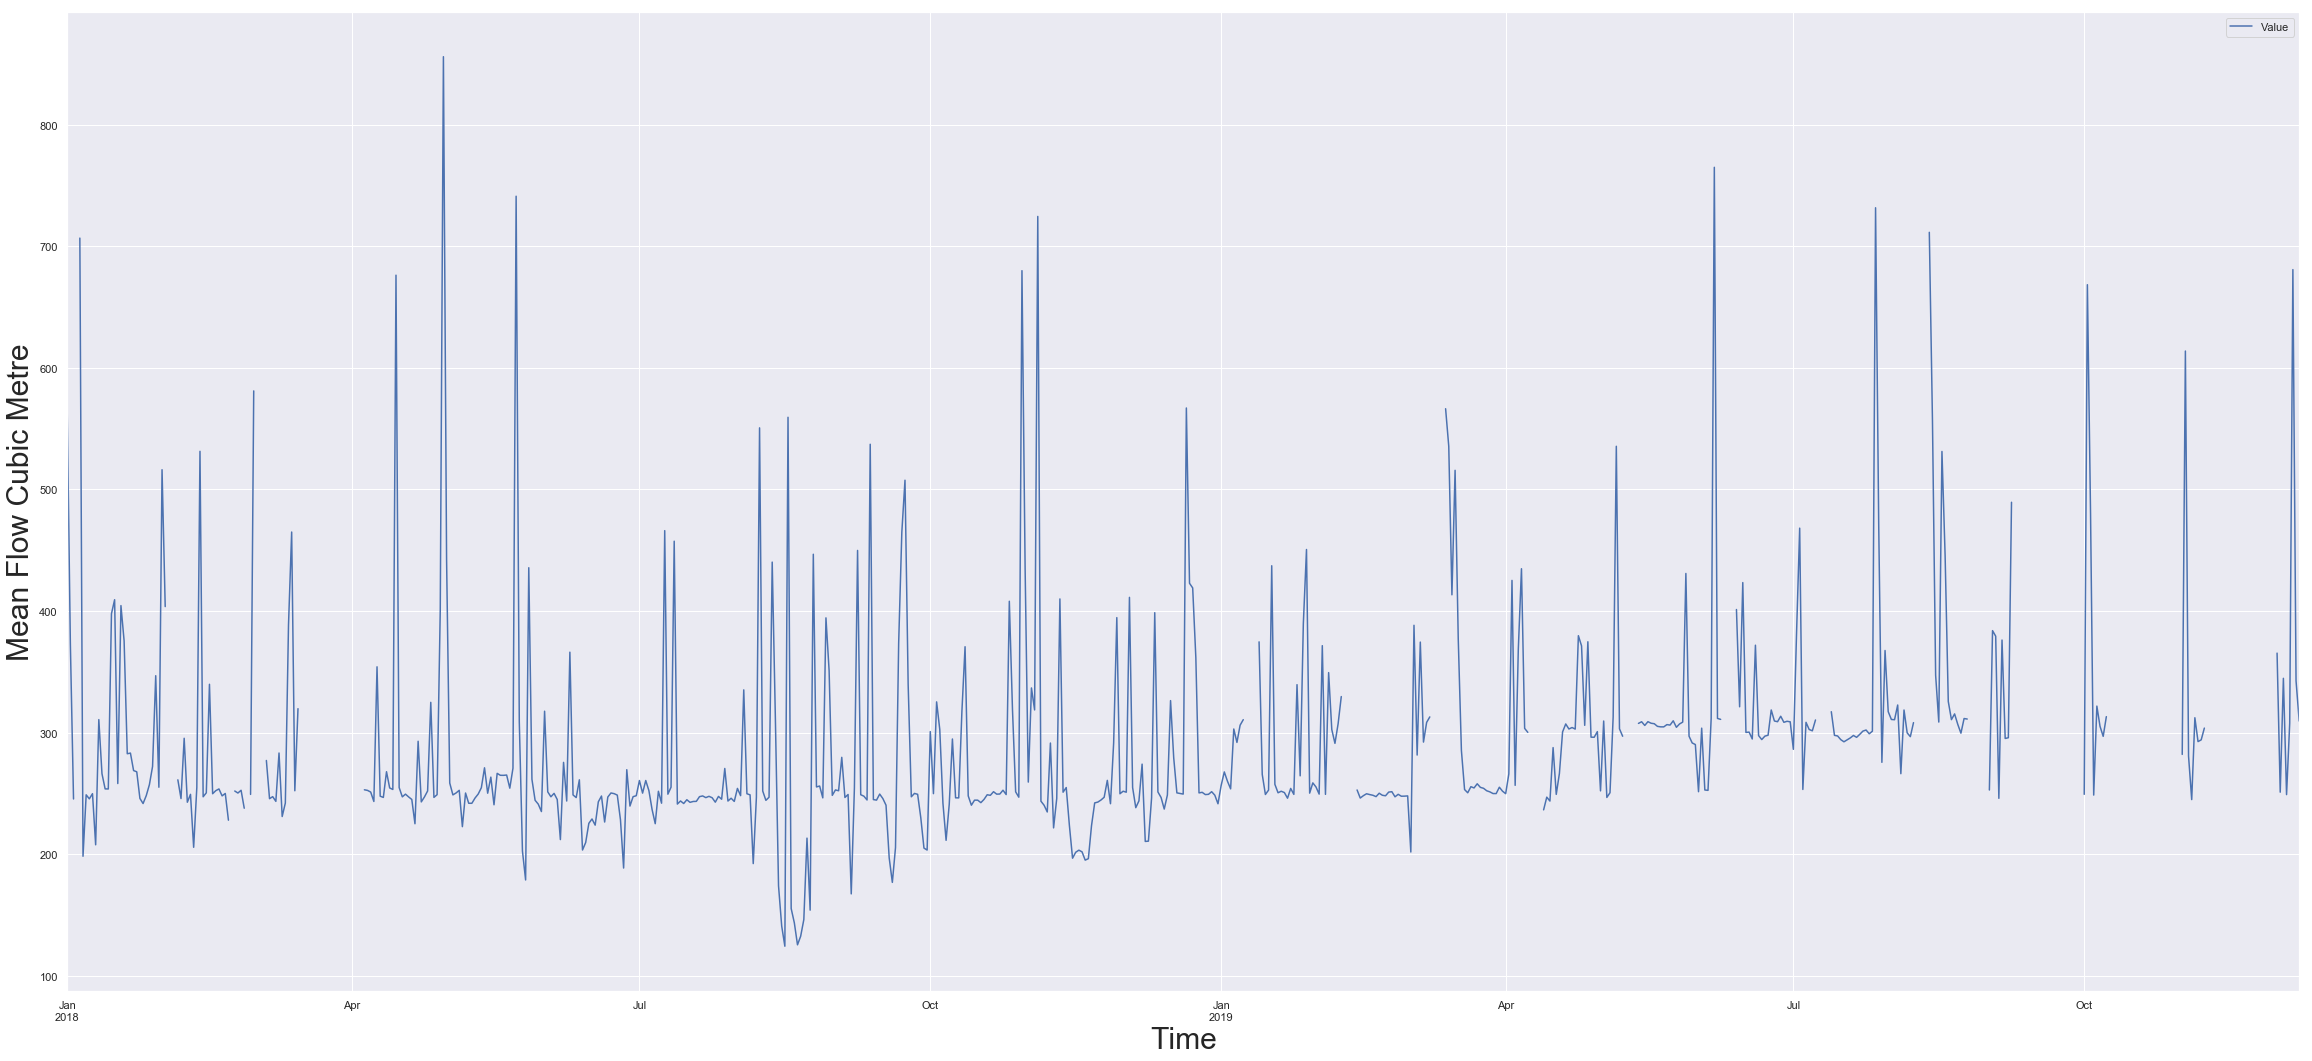

In [6]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
sns.set(rc={'figure.figsize':(40, 18)})
days = list(calendar.day_name)
data = pump150_clean.loc[pump150_clean['Tagname'].str.contains("Debietmeting"),]
data_mean = pump150_clean['Value'].resample('D').mean()
mean_daily_flow = data_mean.to_frame()
ax = mean_daily_flow.plot()
ax.set_xlabel('Time', fontsize=30)
ax.set_ylabel('Mean Flow Cubic Metre', fontsize=30)
ax

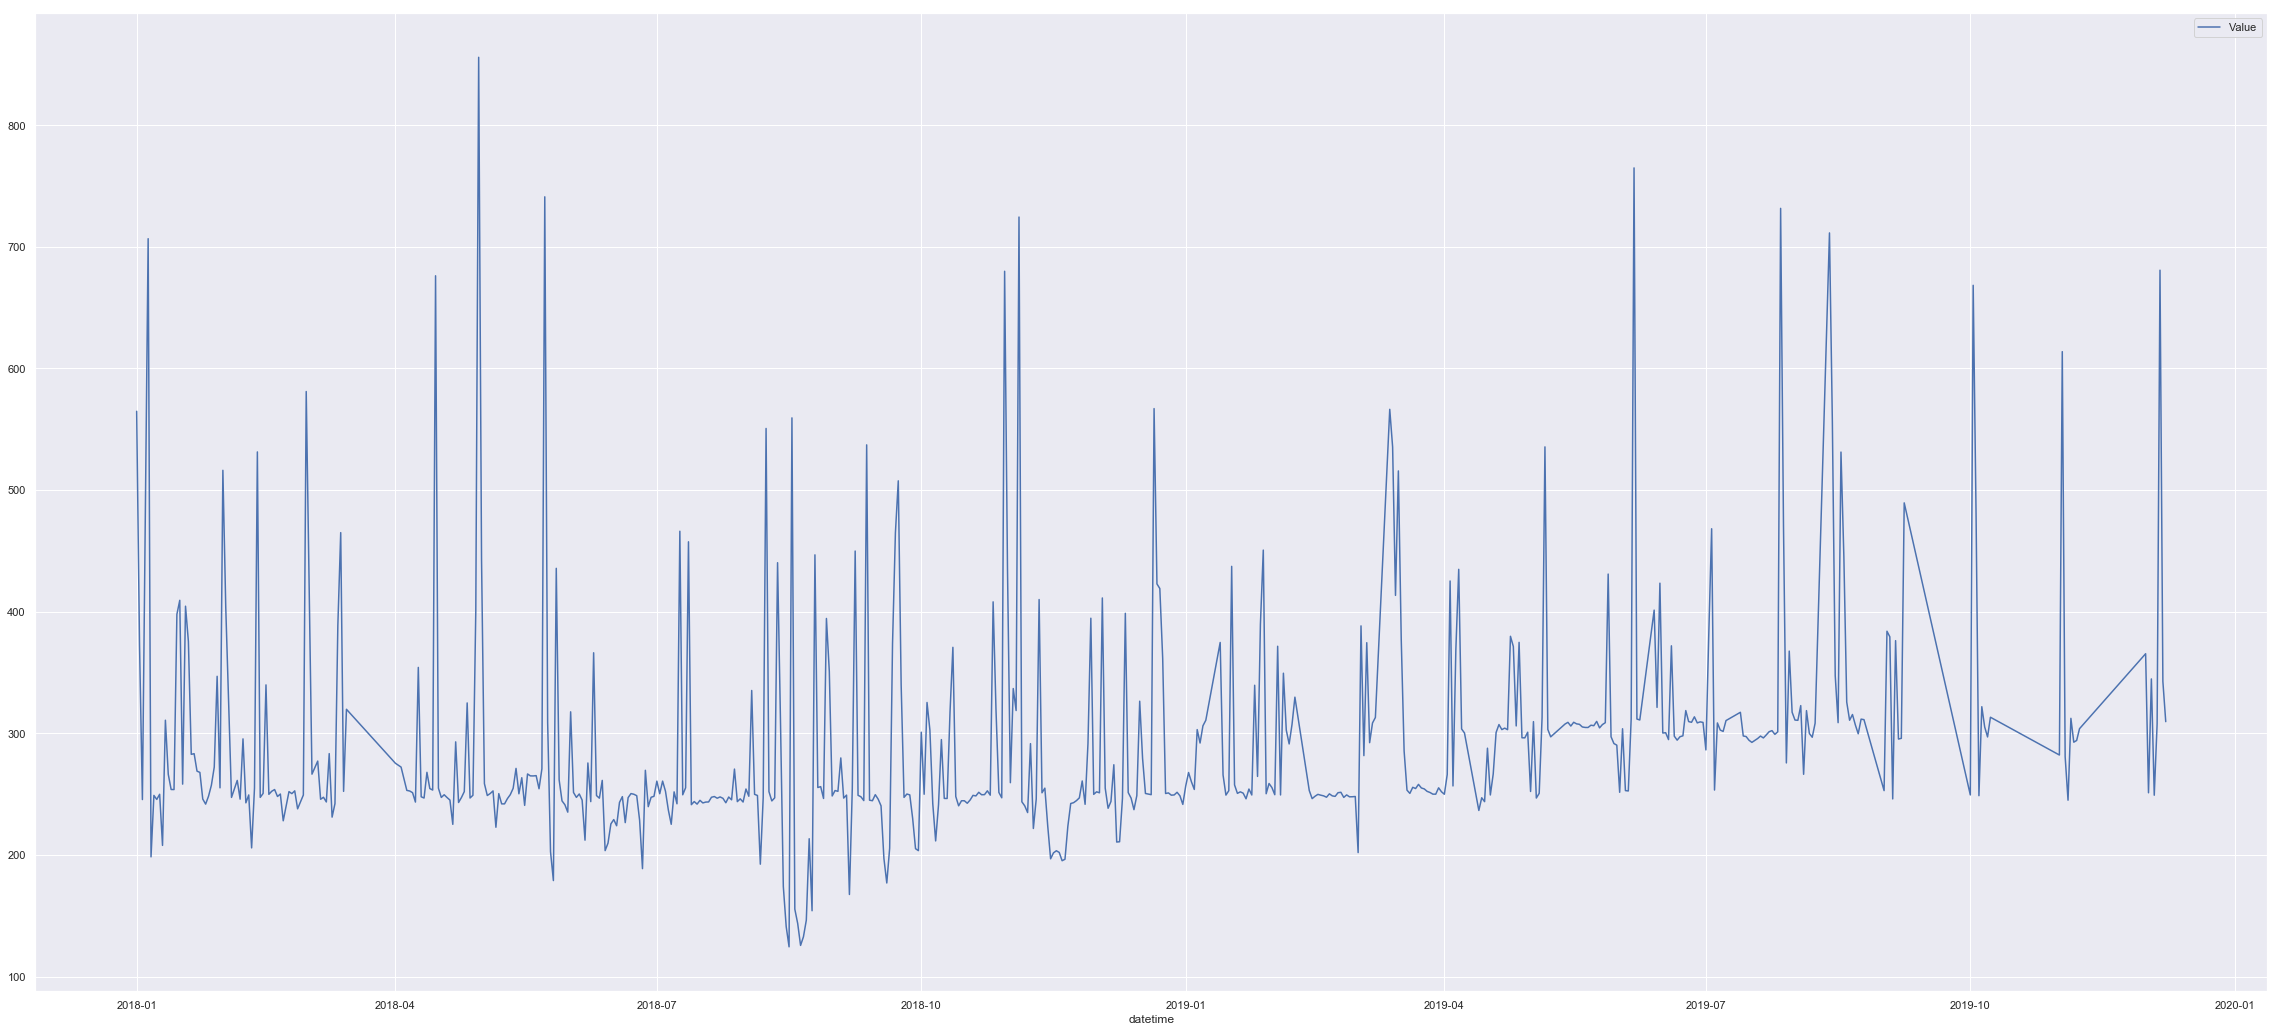

In [71]:
data['Value'].mean()

425.04948930173794

In [7]:
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])
data['weekday'] = data["TimeStamp"].dt.dayofweek

C:\Users\20172648\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\20172648\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


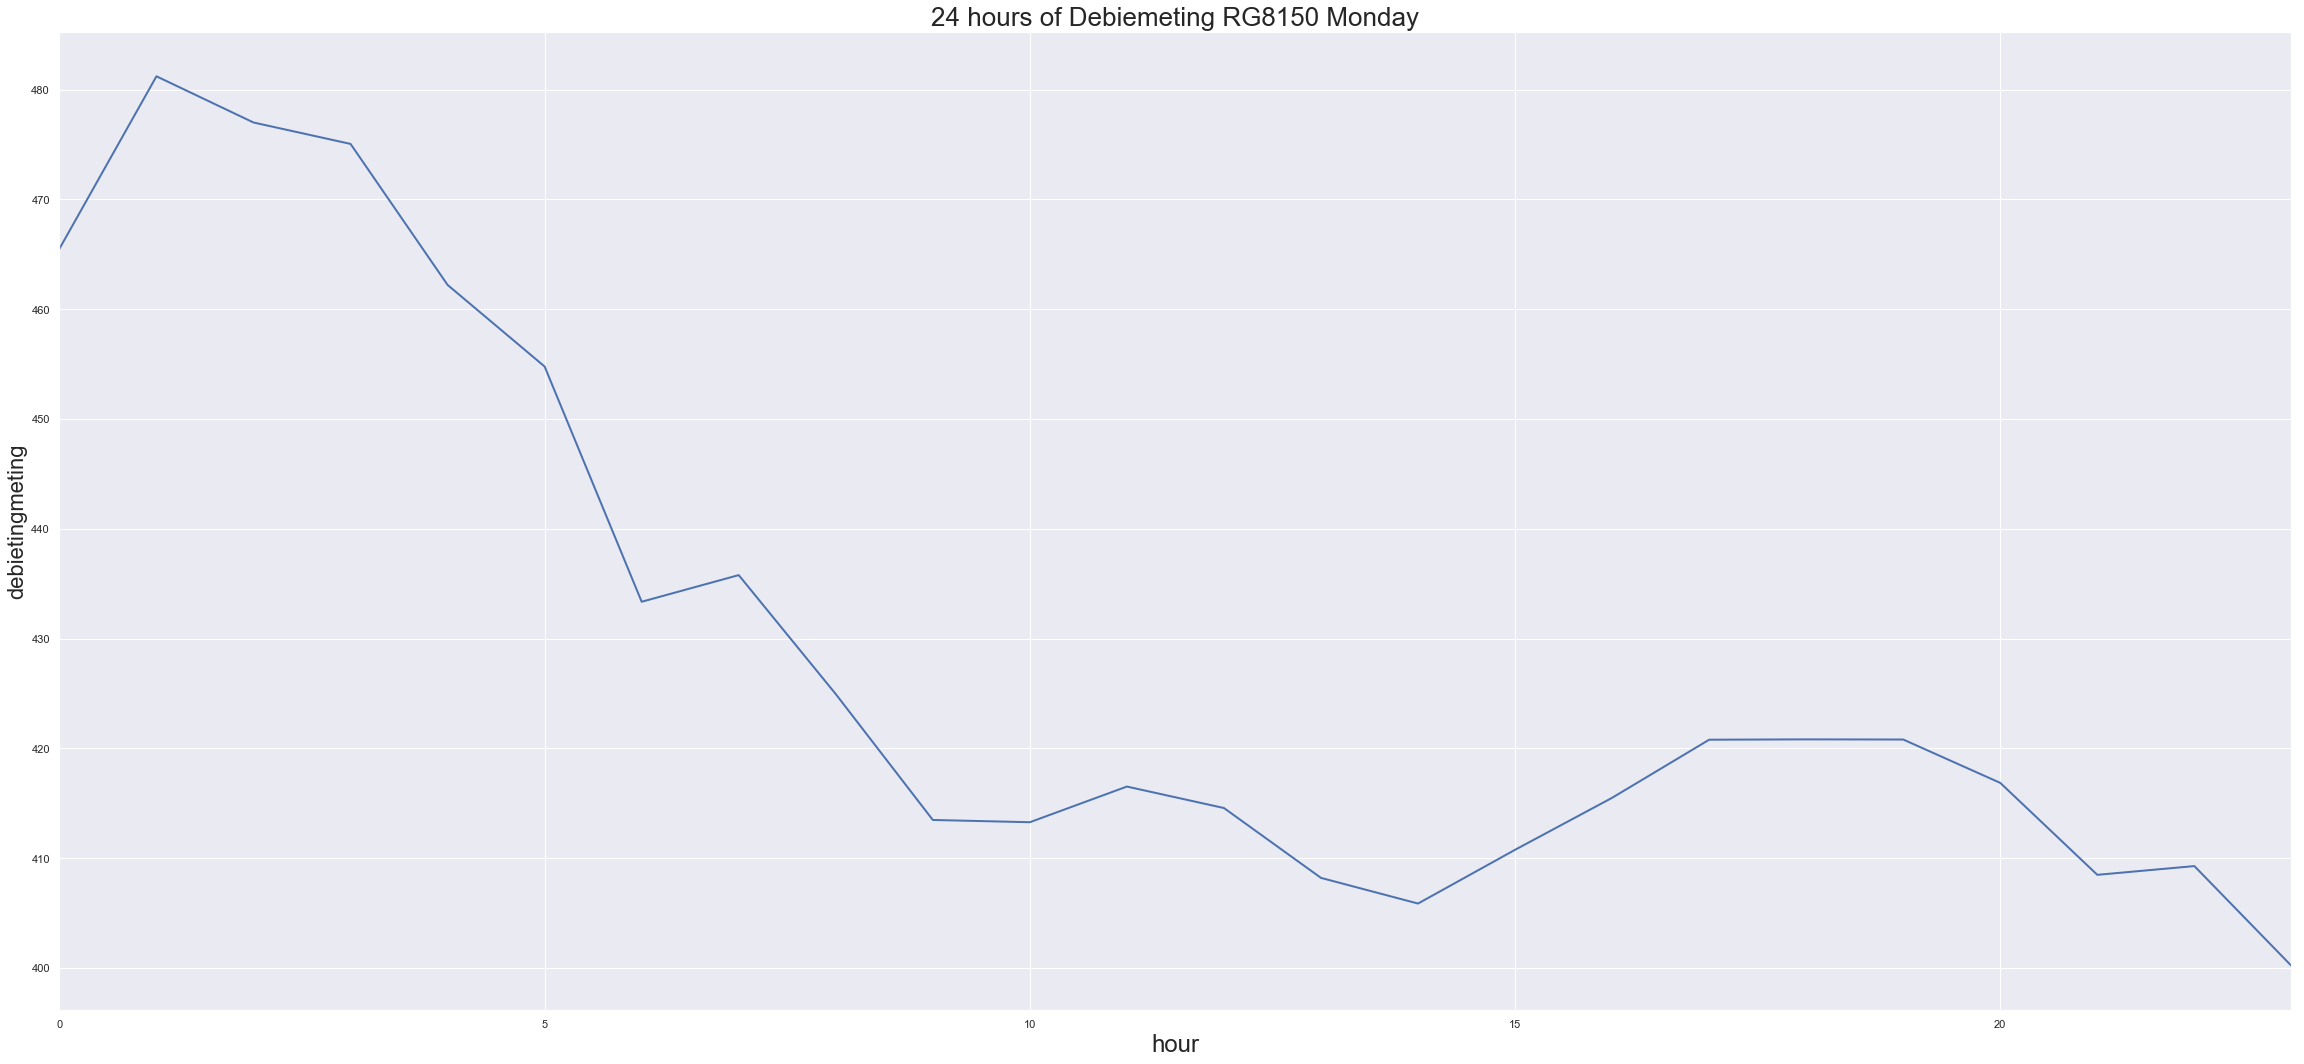

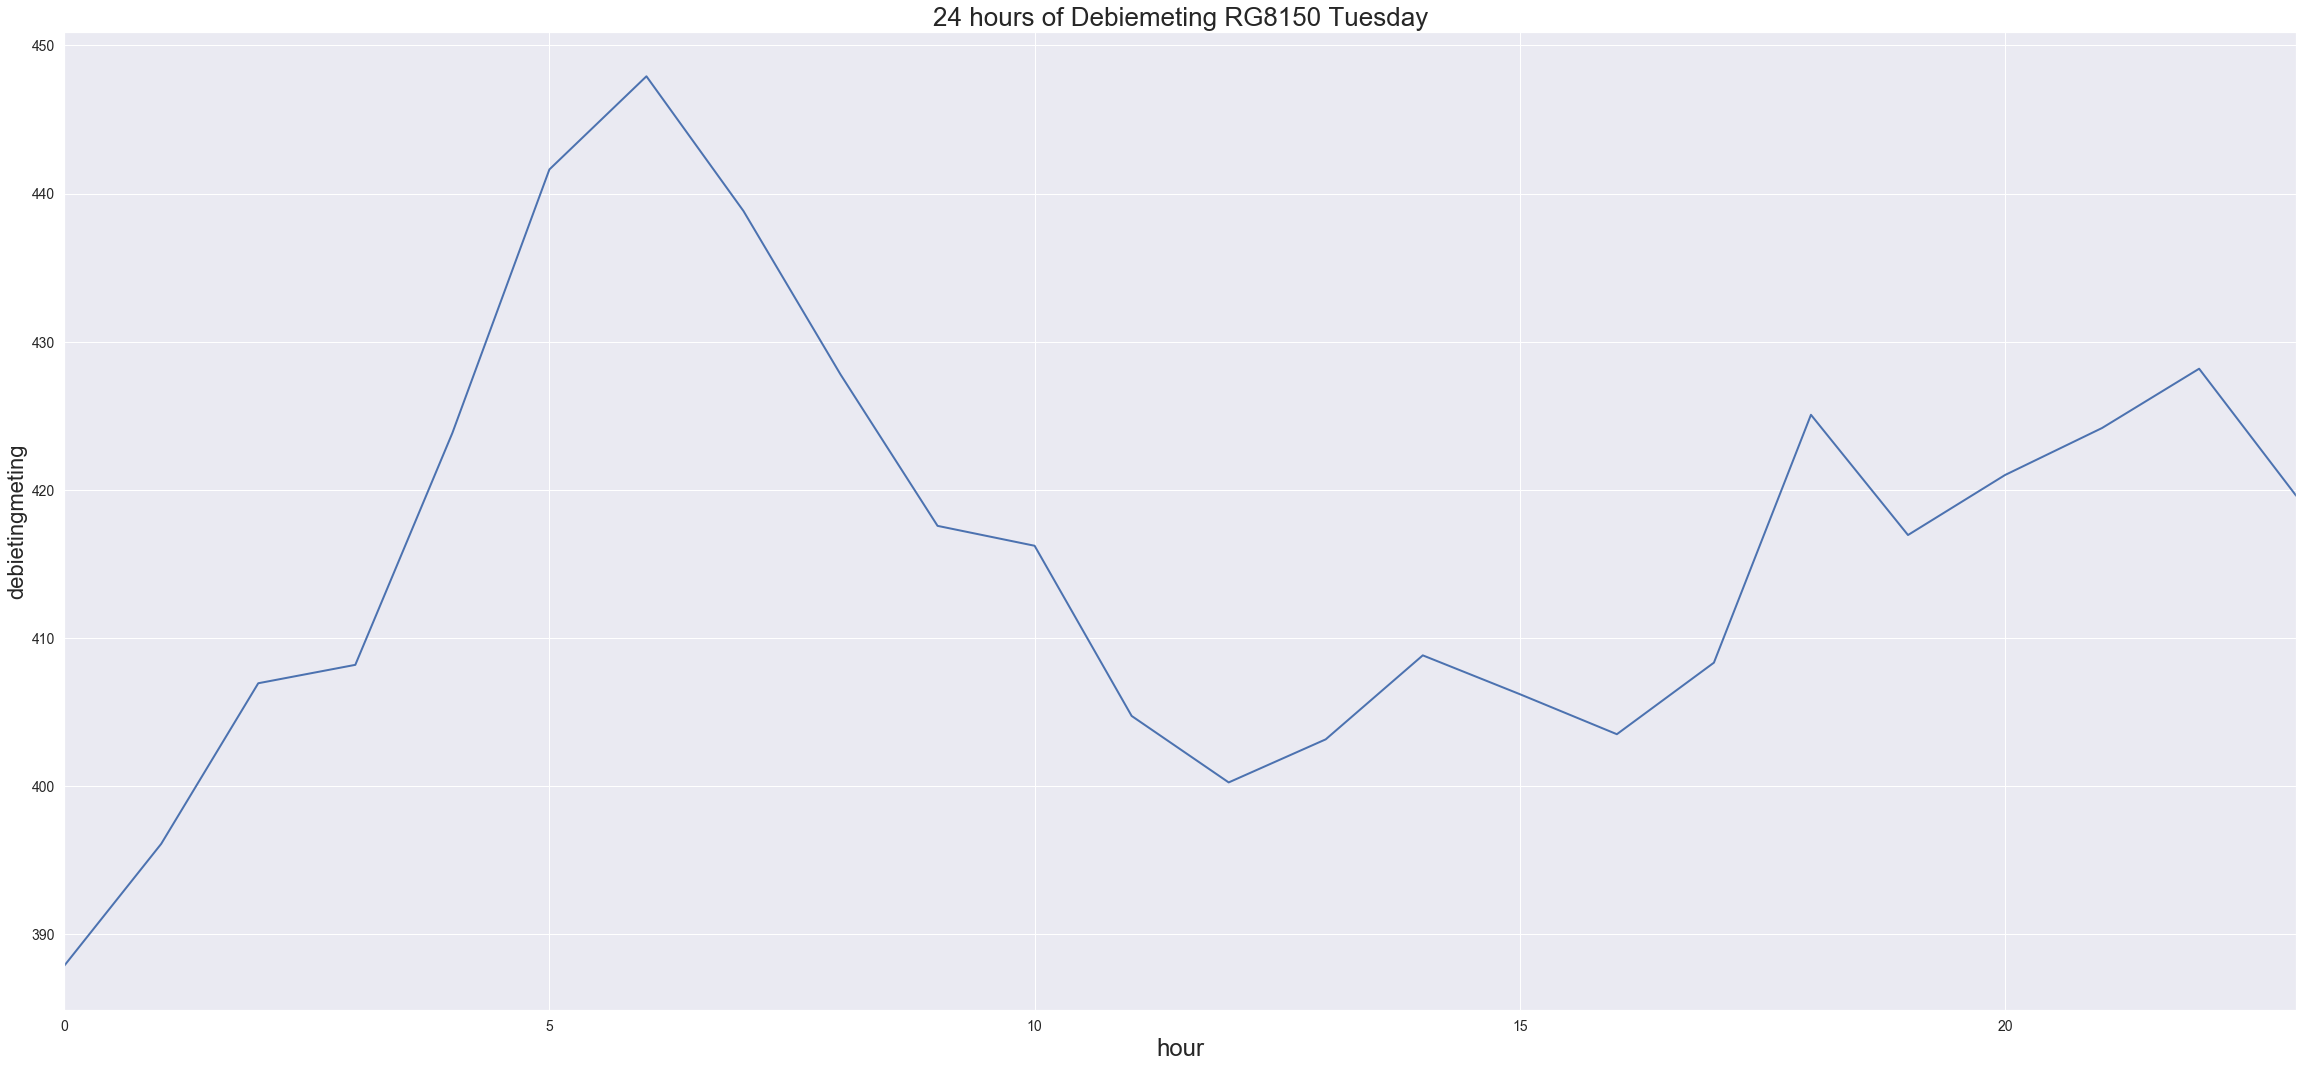

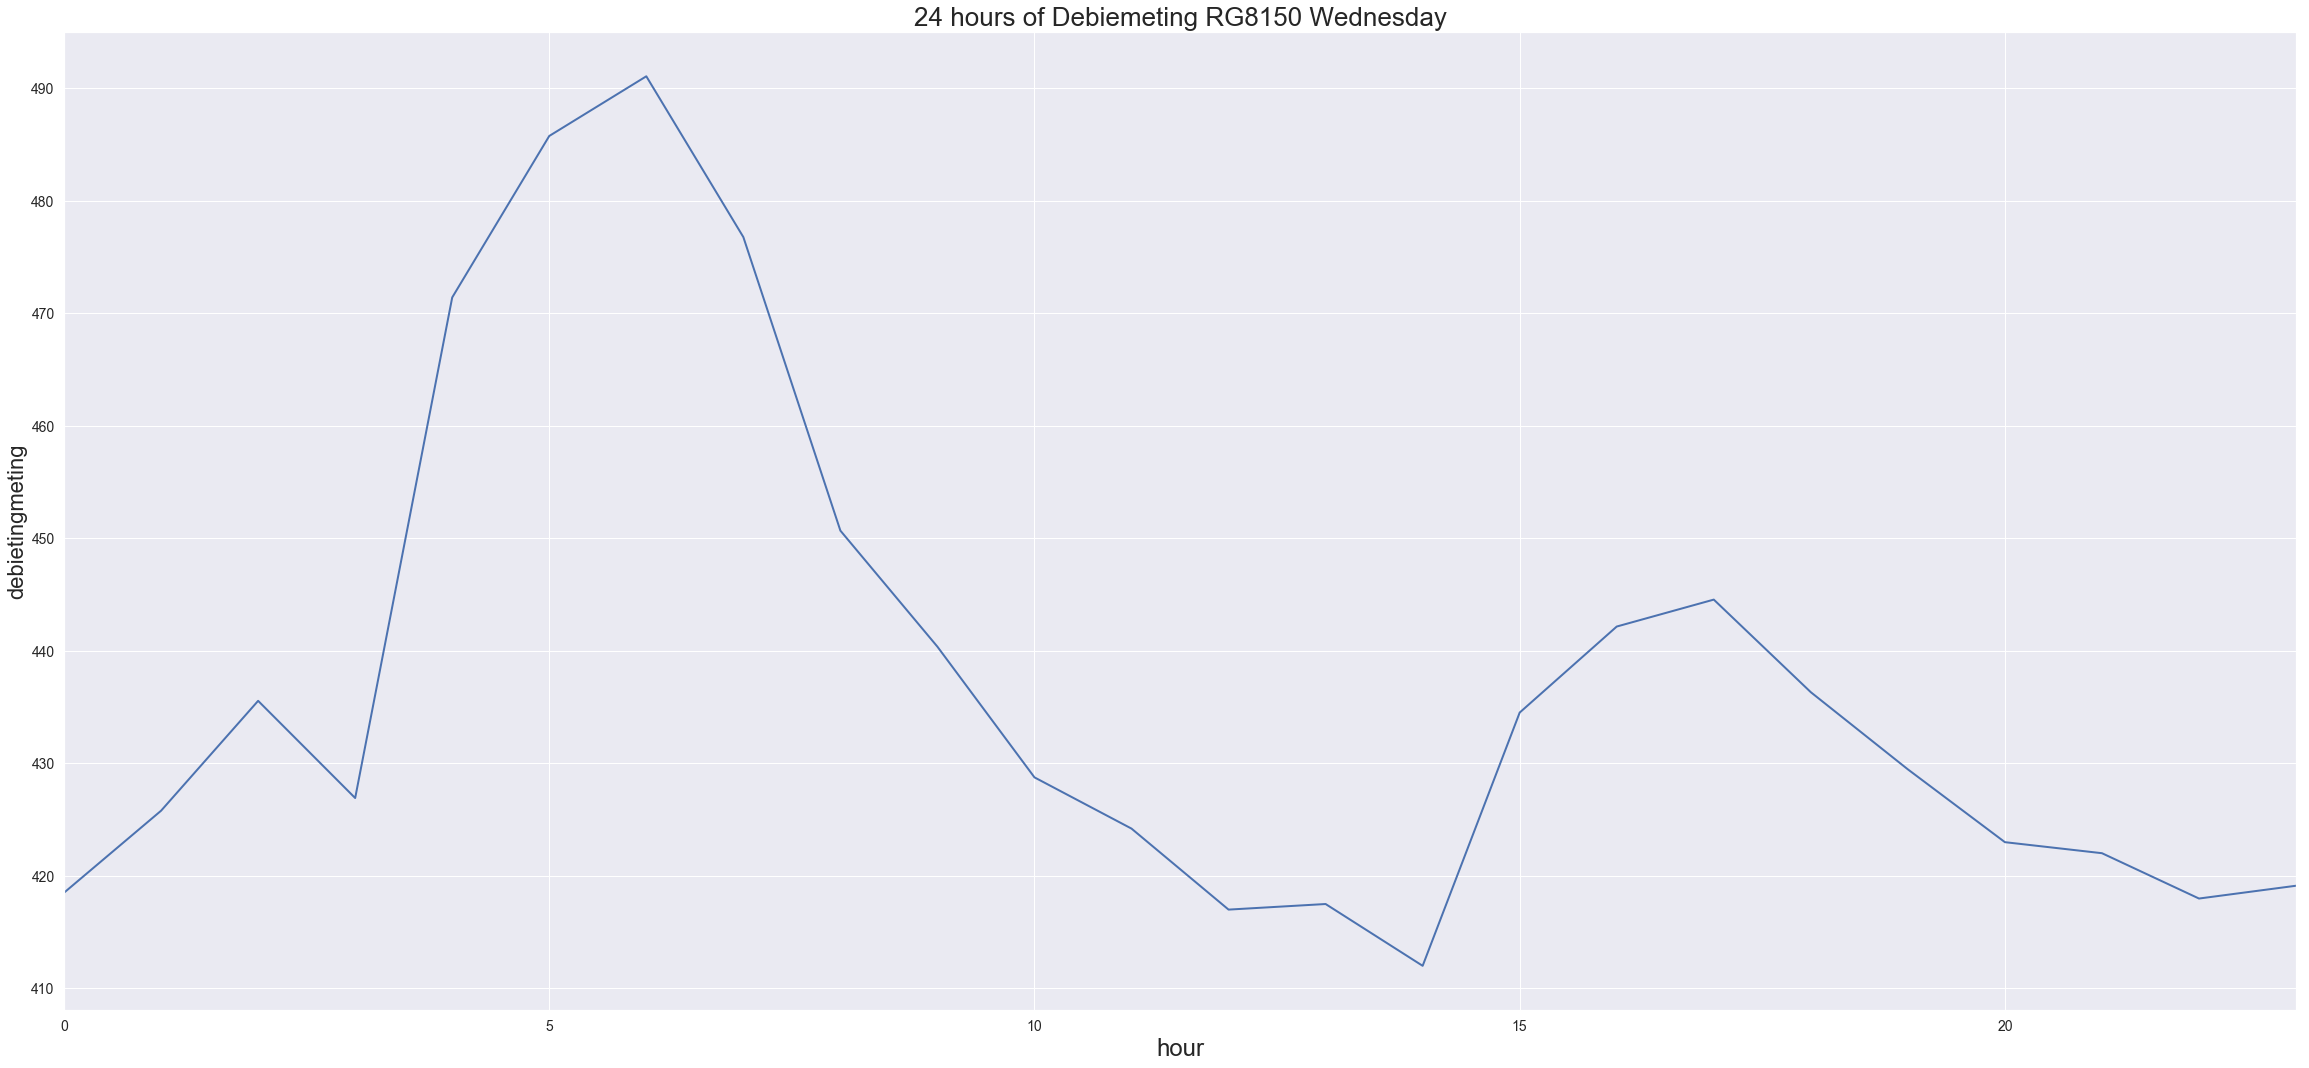

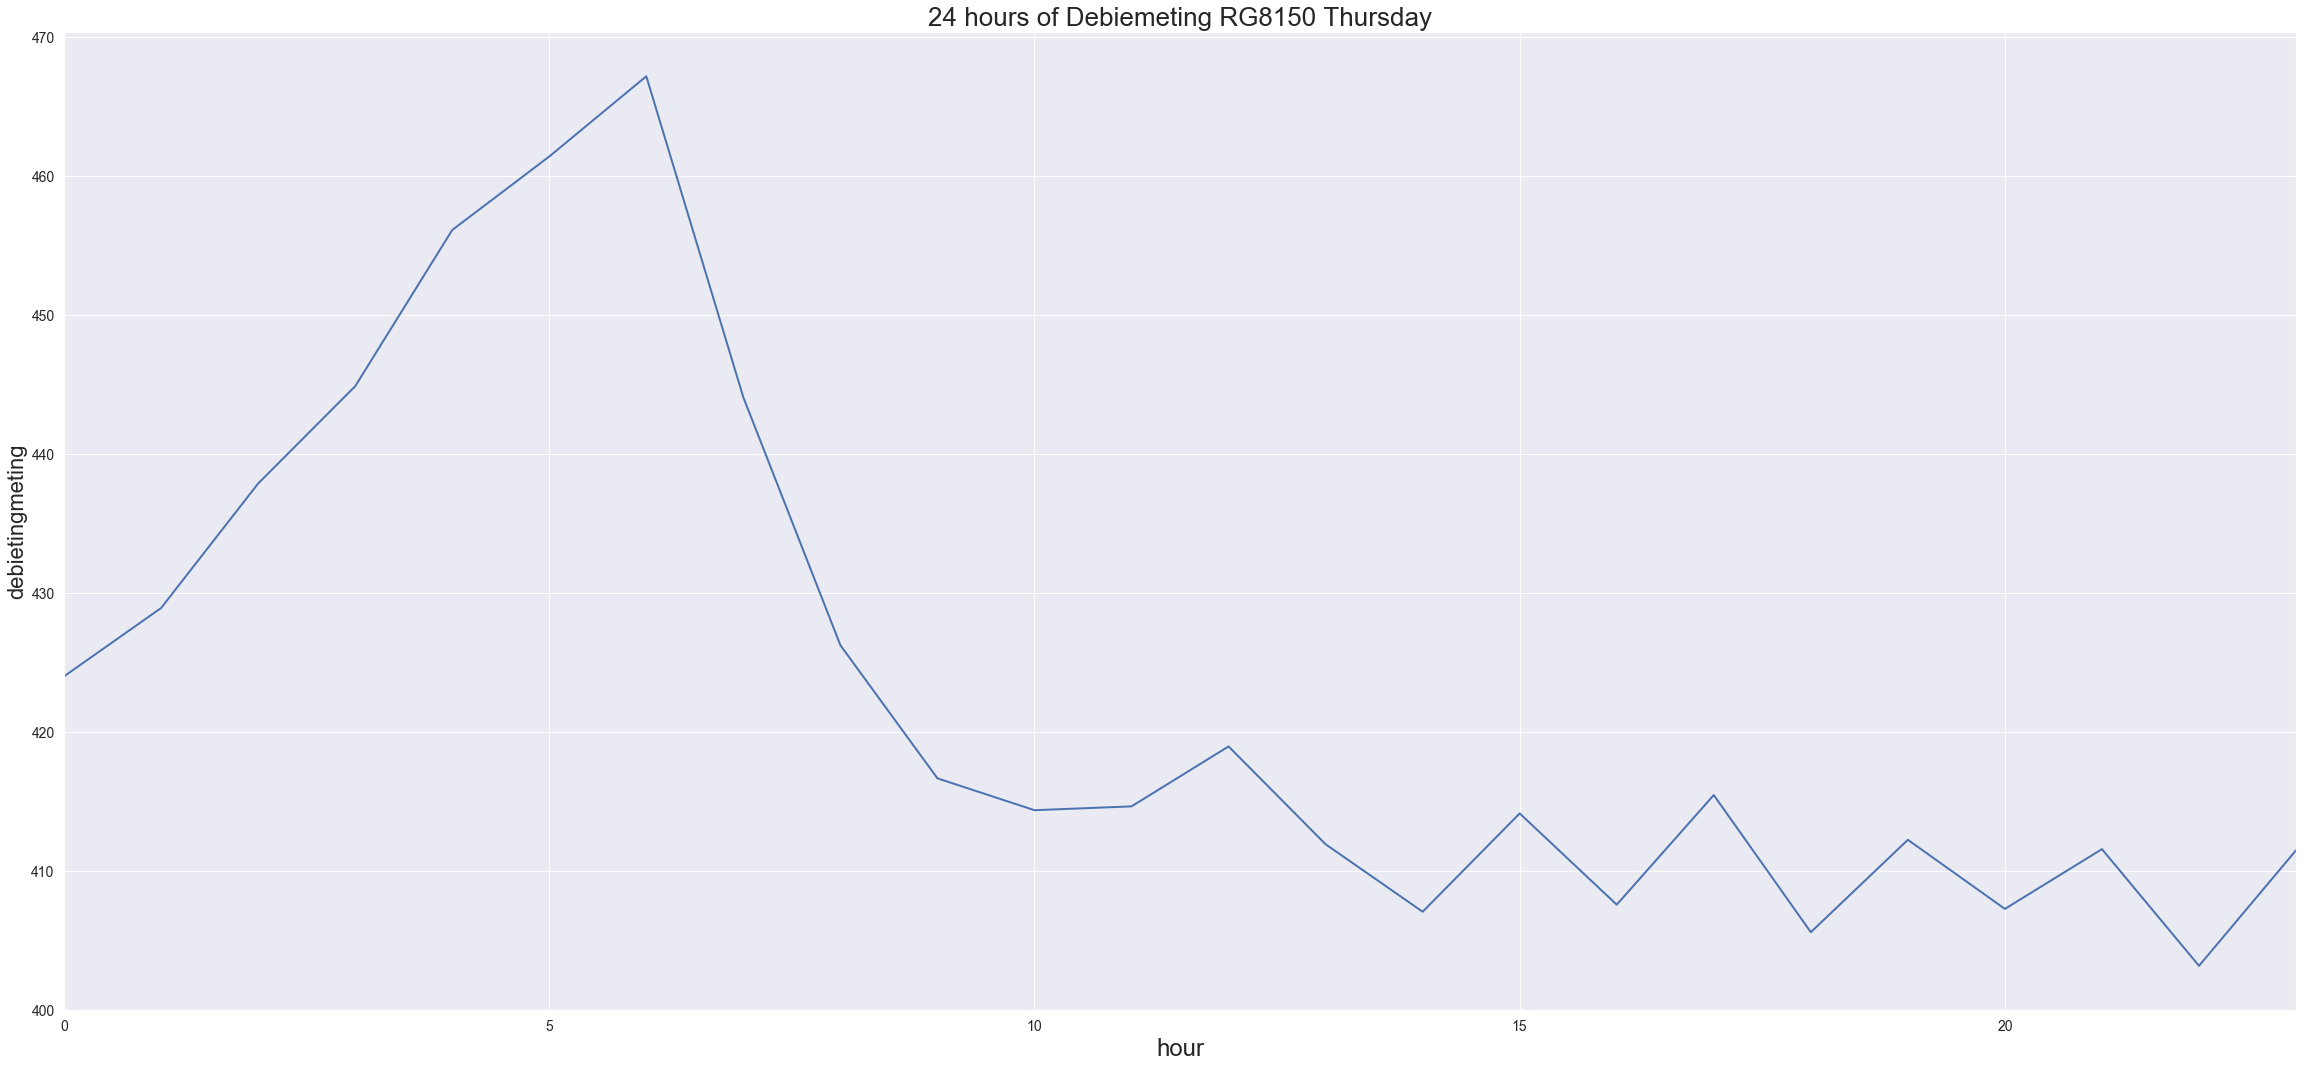

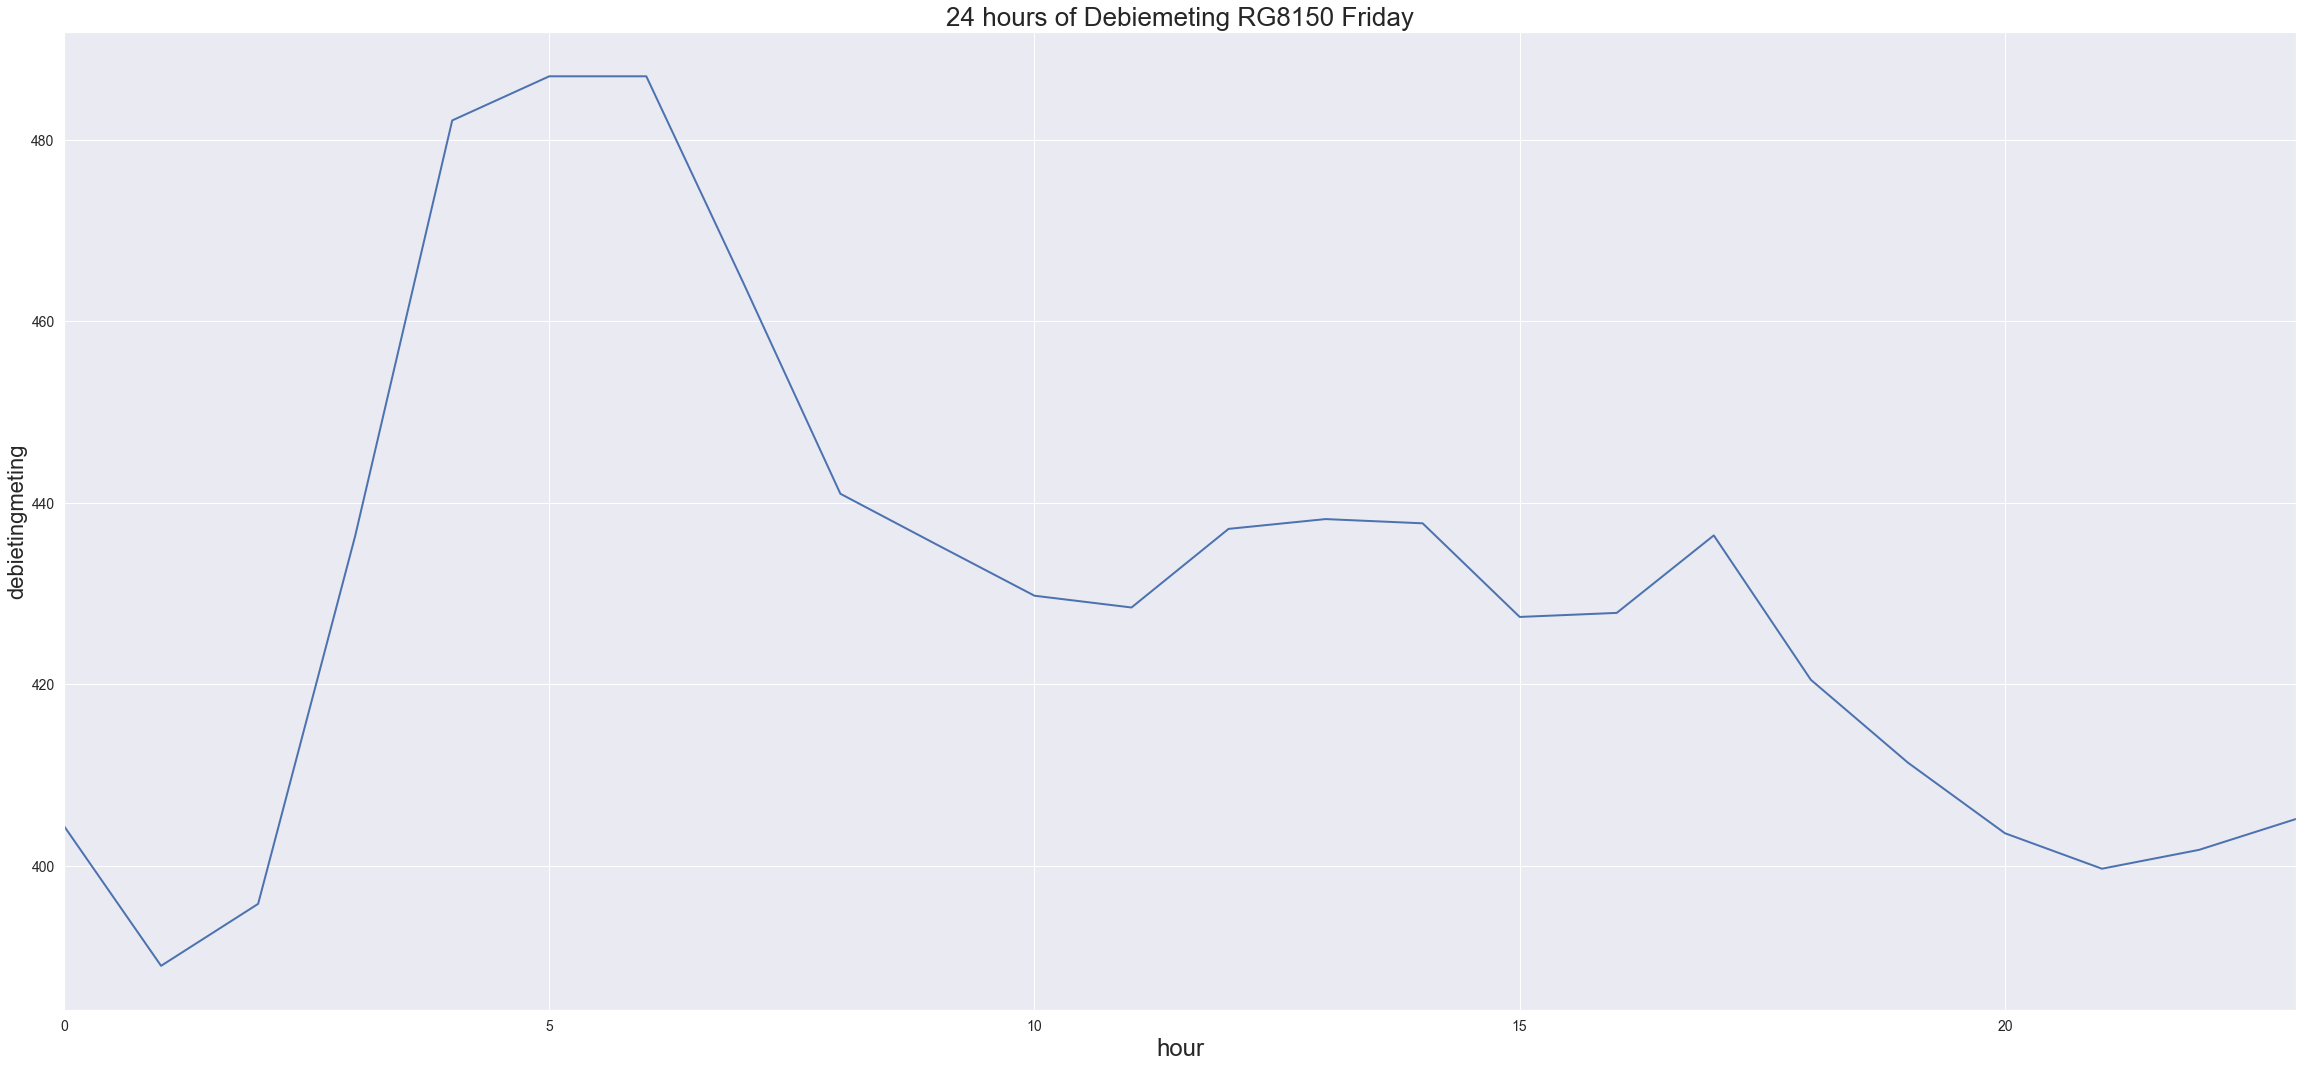

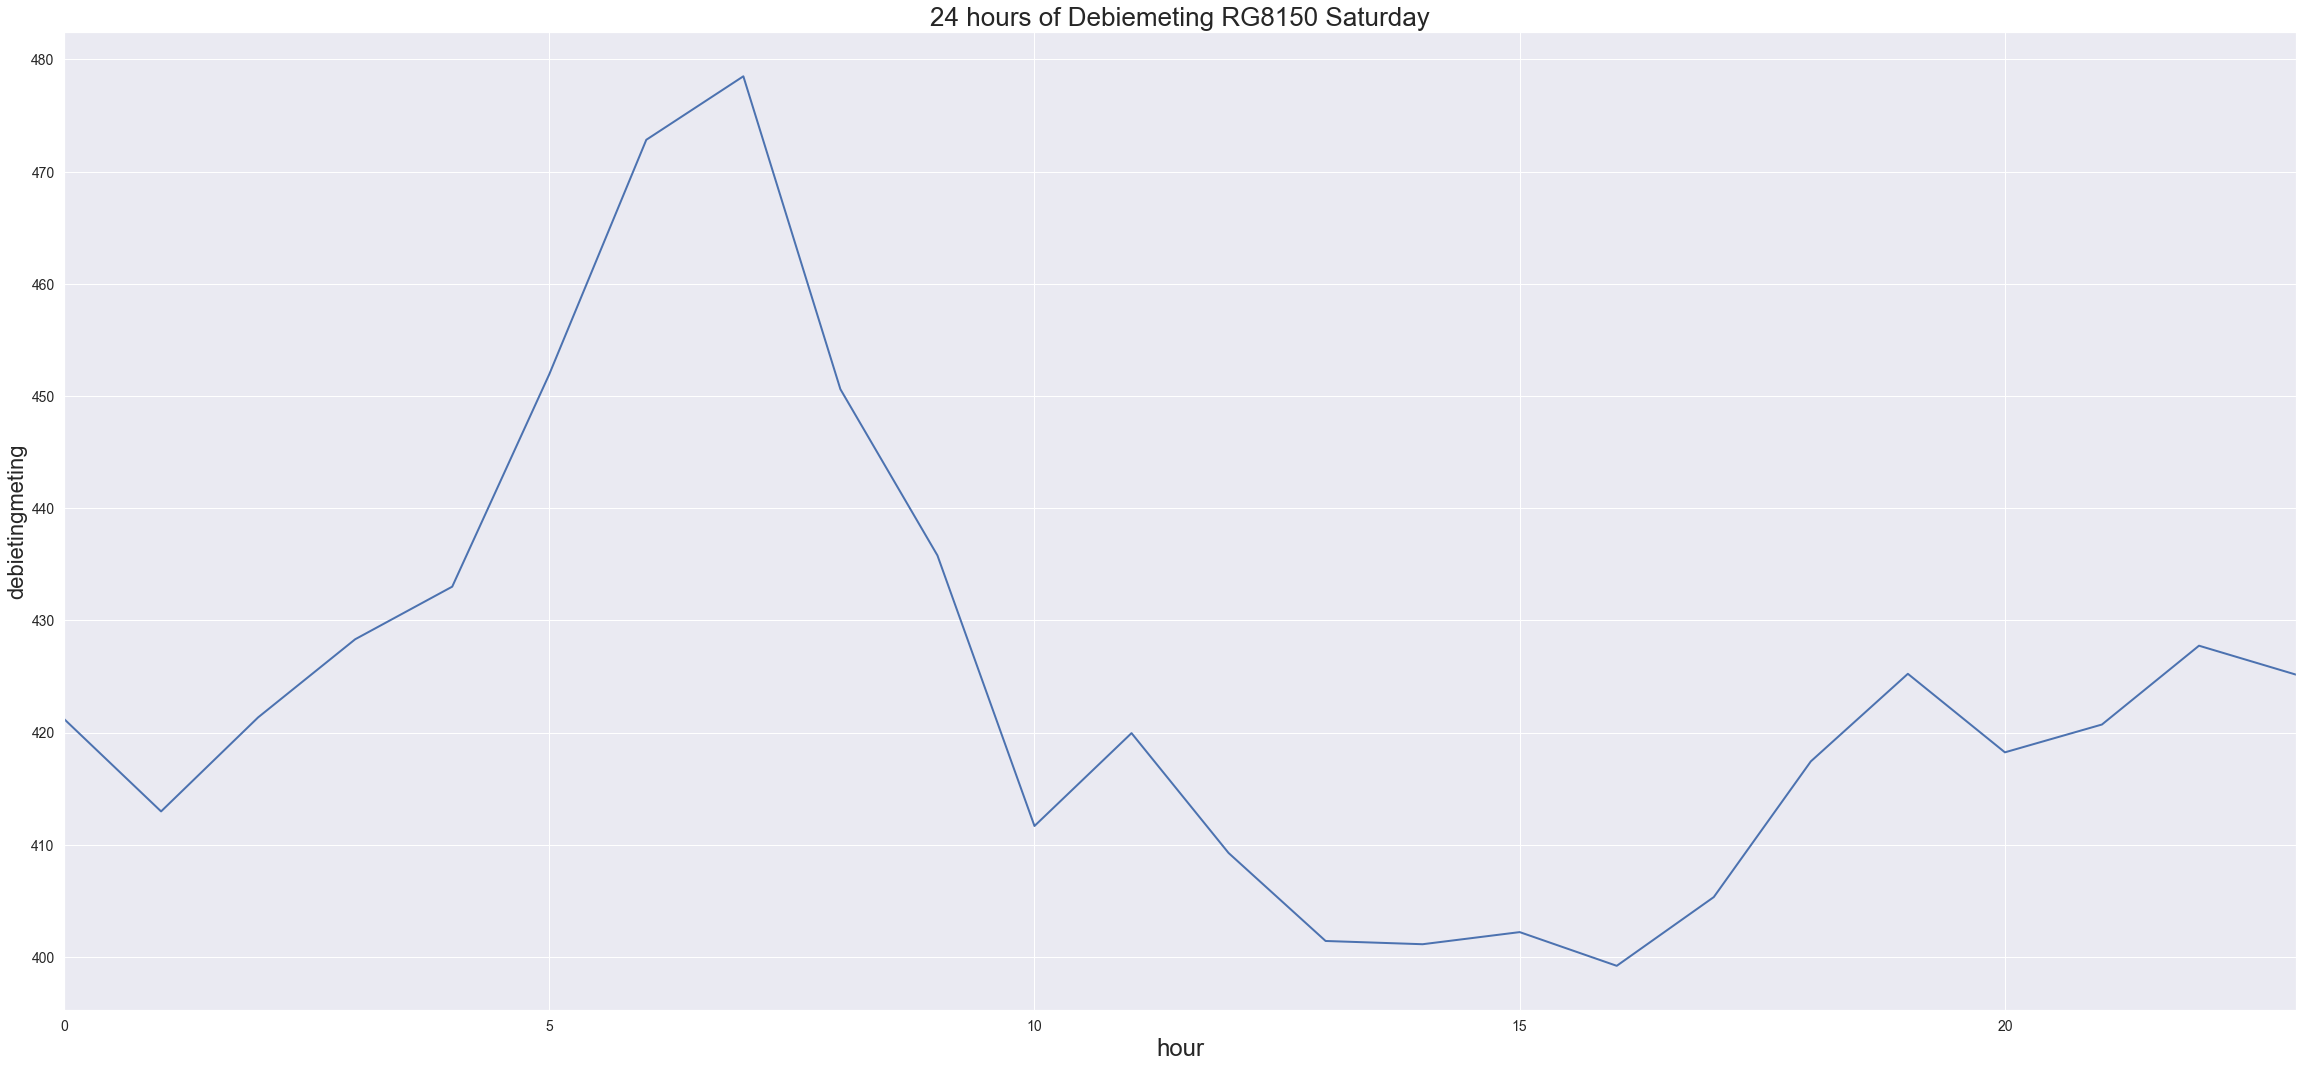

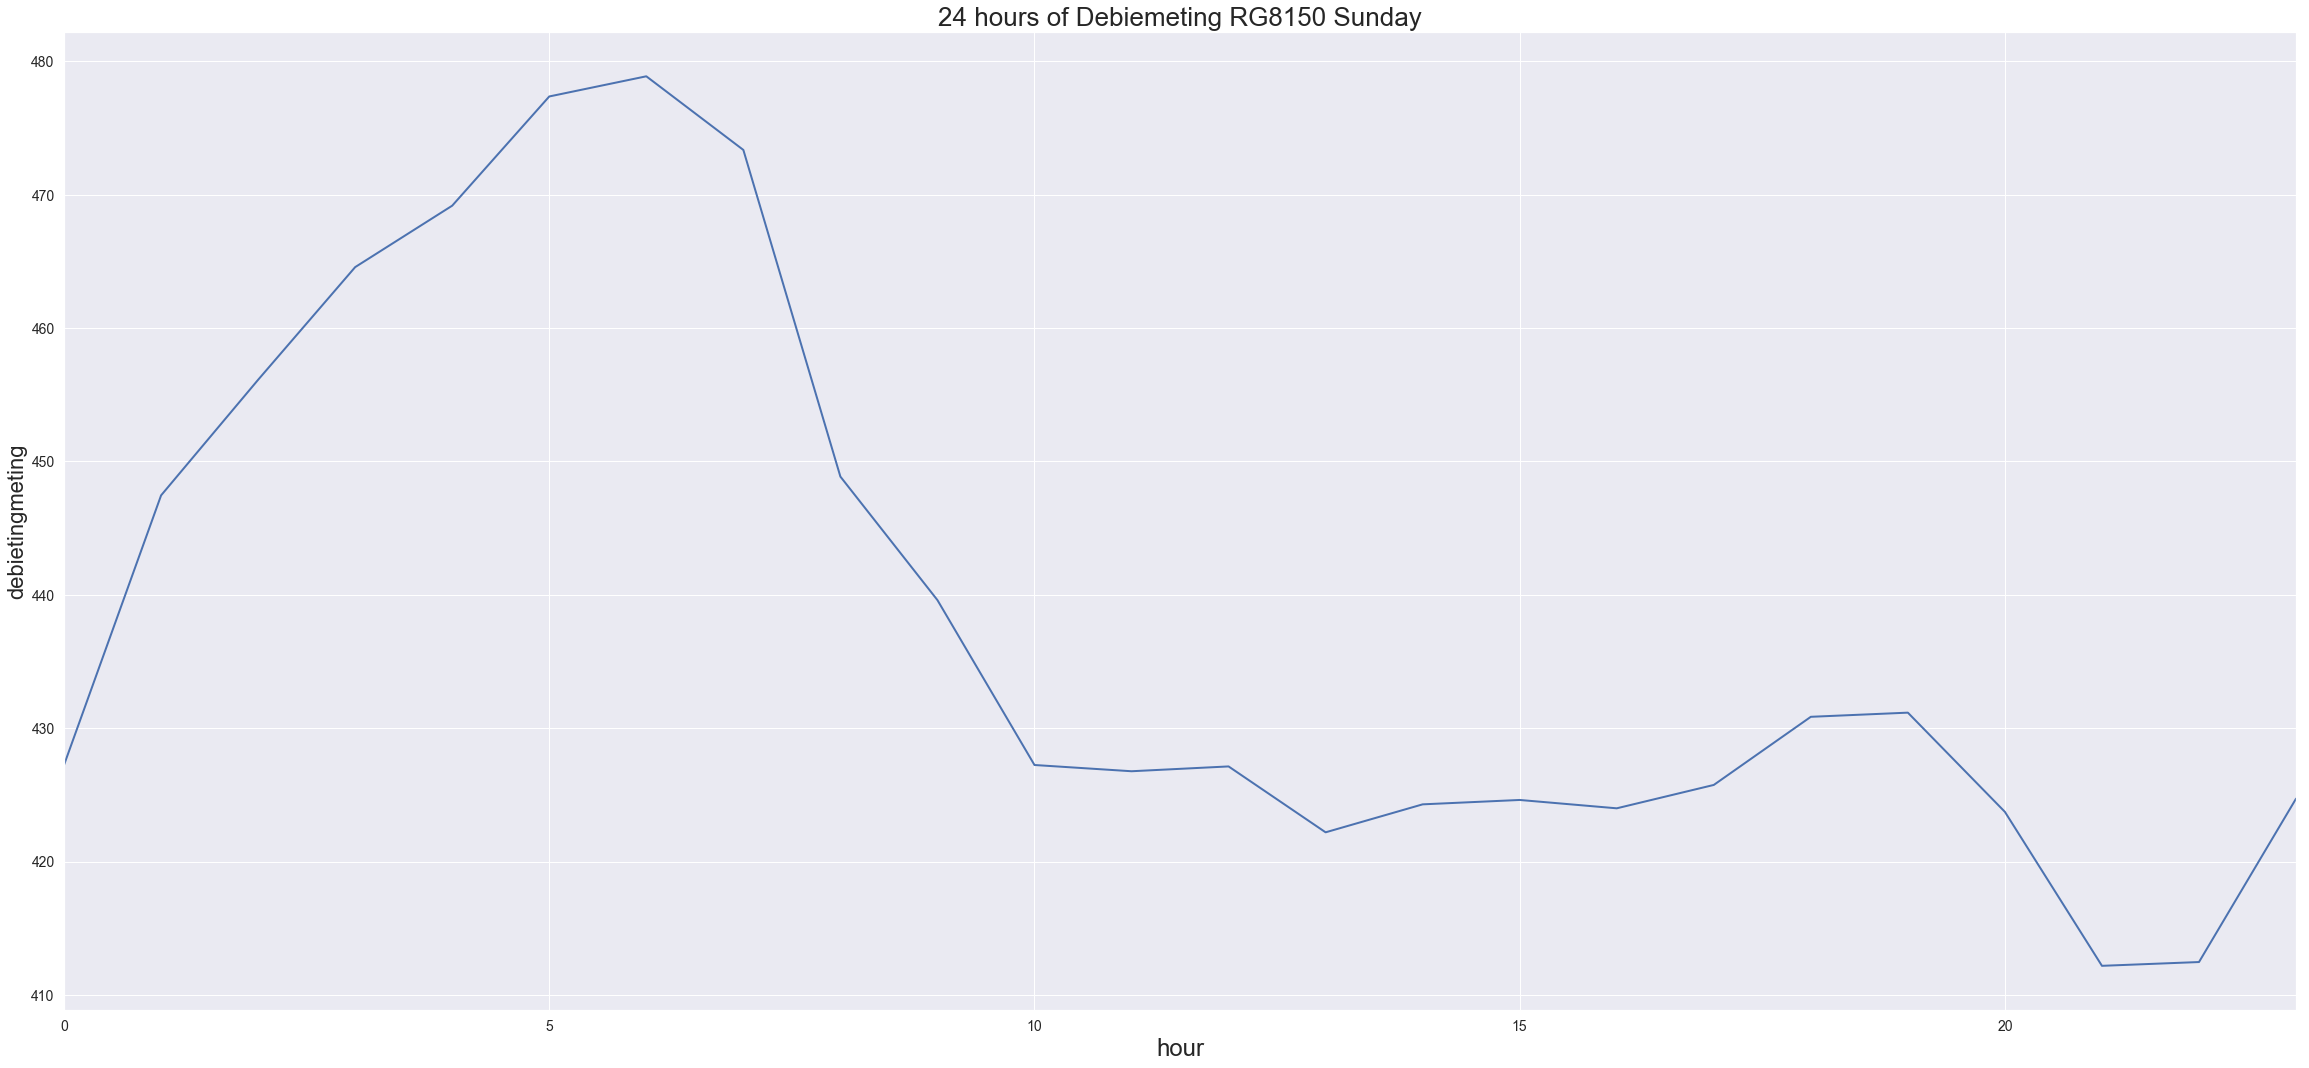

In [8]:
for i in range(7):
    plt.figure()
    df = data[data['weekday']==i]
    df = df.groupby(df.index.hour)['Value'].mean()
    df.plot(lw=2)
    plt.xlabel('hour', fontsize=24)
    plt.ylabel("debietingmeting", fontsize=22)
    plt.rc('xtick',labelsize=14)
    plt.rc('ytick',labelsize=14)
    plt.title('24 hours of ' + "Debiemeting" + ' ' + "RG8150" + ' ' + days[i],
        size=26)
    plt.savefig('24 hours of ' + "Debietmeting" + ' ' + "RG8150" + ' ' + \
        days[i] + '.png')

In [27]:
mean_day = data[data['weekday']==6]
mean_day['Value'].mean()

432.65685359095926

In [29]:
data['month'] = data["TimeStamp"].dt.month
data.head()

C:\Users\20172648\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Comments,DataQuality,PercentGood,Tagname,TimeStamp,Value,weekday,month
datetime,,,,,,,,
2018-01-01 00:00:05,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,2018-01-01 00:00:05,789.4701,0,1
2018-01-01 00:00:10,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,2018-01-01 00:00:10,781.6238,0,1
2018-01-01 00:00:15,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,2018-01-01 00:00:15,788.5692,0,1
2018-01-01 00:00:20,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,2018-01-01 00:00:20,788.7045,0,1
2018-01-01 00:00:25,NaN,Good,100.0,GBS_DB.RG8150/FT510/Debietmeting.Q,2018-01-01 00:00:25,789.4104,0,1


### New data, objective 2

In [82]:
import pandas as pd

In [98]:
raindf = pd.read_csv('rain_timeseries/rain_timeseries_overall.csv', sep=',')
#new_header = raindf.iloc[1] #grab the first row for the header
#raindf = raindf[2:]
#raindf.columns = new_header
raindf.head()
#new_header

,Begin,Eind,Kwaliteit,Lekerstraat,11. Speelweide/Vlinkert,Rips,Handel,14. Koolhof,13. Heiakker,Vlierden,...,Ooivaarsrijt,de Brand,Bitswijk,de Geer-zuid,De Hoeven(Haarsteeg),11+19 Grevekeur,CHV-terrein,Geb. 12 Vughterpoort,Heusdenseweg(Haarsteeg),Bosscheweg
0,31-05-2018 22:00:00,31-05-2018 22:05:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31-05-2018 22:05:00,31-05-2018 22:10:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31-05-2018 22:10:00,31-05-2018 22:15:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31-05-2018 22:15:00,31-05-2018 22:20:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31-05-2018 22:20:00,31-05-2018 22:25:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
raindata_bok_clean = raindf[['Bokhoven', 'Begin', 'Eind']] #according to data_overview_rzwi_denbosch  this one is connected to RG8180_q0
raindata_bok_clean['Begin'] = pd.to_datetime(raindata_bok_clean['Begin'], errors='ignore')
raindata_bok_clean['Eind'] = pd.to_datetime(raindata_bok_clean['Eind'], errors='ignore')
raindata_bok_clean = raindata_bok_clean.set_index('Eind')

pump_bok = pd.read_csv("data_pump\RG8180_Q0\RG8180_Q0_overall.csv")
pump_bok_clean = pump_bok.loc[pump_bok['historianTagnummer'].str.contains("Debietmeting"),]
pump_bok_clean['begin'] = pd.to_datetime(pump_bok_clean['datumBeginMeting'], errors='ignore')
pump_bok_clean['eind'] = pd.to_datetime(pump_bok_clean['datumEindeMeting'], errors='ignore')
pump_bok_clean['index'] = pump_bok_clean['eind']
pump_bok_clean = pump_bok_clean.set_index("index")

C:\Users\20172648\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\20172648\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
#Check if the data is indeed 1 min apart and there are no gaps or bad data.

#its clean but the rain data has some measurements over an hour and some over 5 mins

import time
import datetime as dt
for index, row in pump_bok_clean.iterrows():
    s = row['eind']
    d = row['begin']
    x = s - d
    duration = x.total_seconds()
    if duration != 60:
        print("this line is bad:", index)

In [103]:
raindata_bok_clean= raindata_bok_clean.sort_values(by='Eind')
aq1 = raindata_bok_clean['2018-01-01 00:00:00' :'2019-08-24 00:00:00']

In [111]:
pump_bok_clean = pump_bok_clean.sort_values(by='index')
# just need the rain data 2019-08-24 00:00:00 - 2018-01-01 00:01:00	

In [105]:
# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 20, 10  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

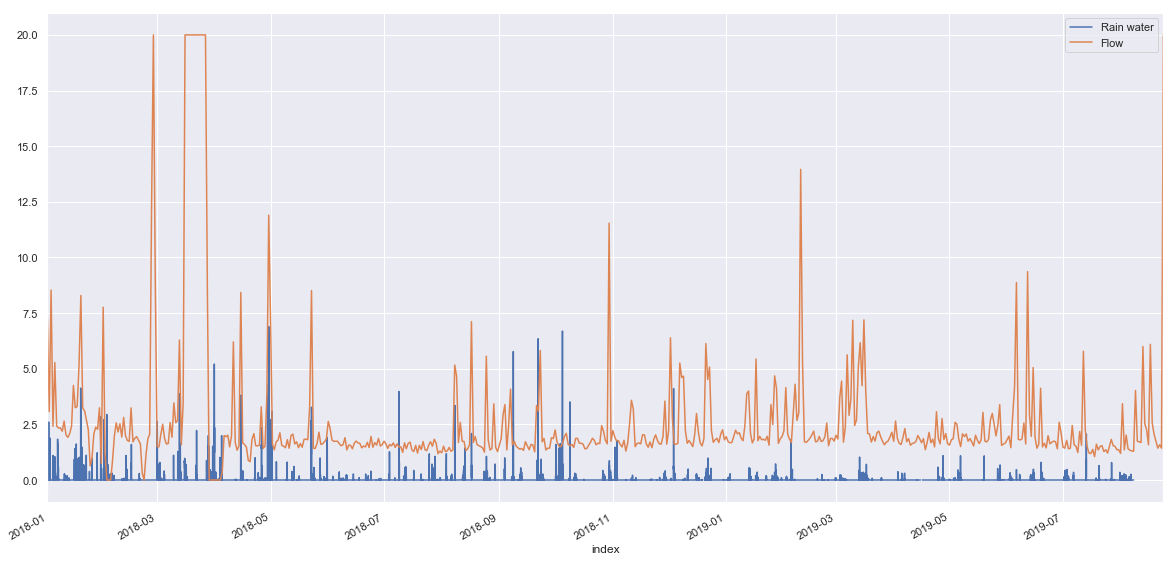

In [116]:
daily_flow_bok = pump_bok_clean['hstWaarde'].resample('D').mean()
ax = aq1['Bokhoven'].plot()
daily_flow_bok.plot(ax=ax)
ax.legend(['Rain water', 'Flow'])

## Over een maand

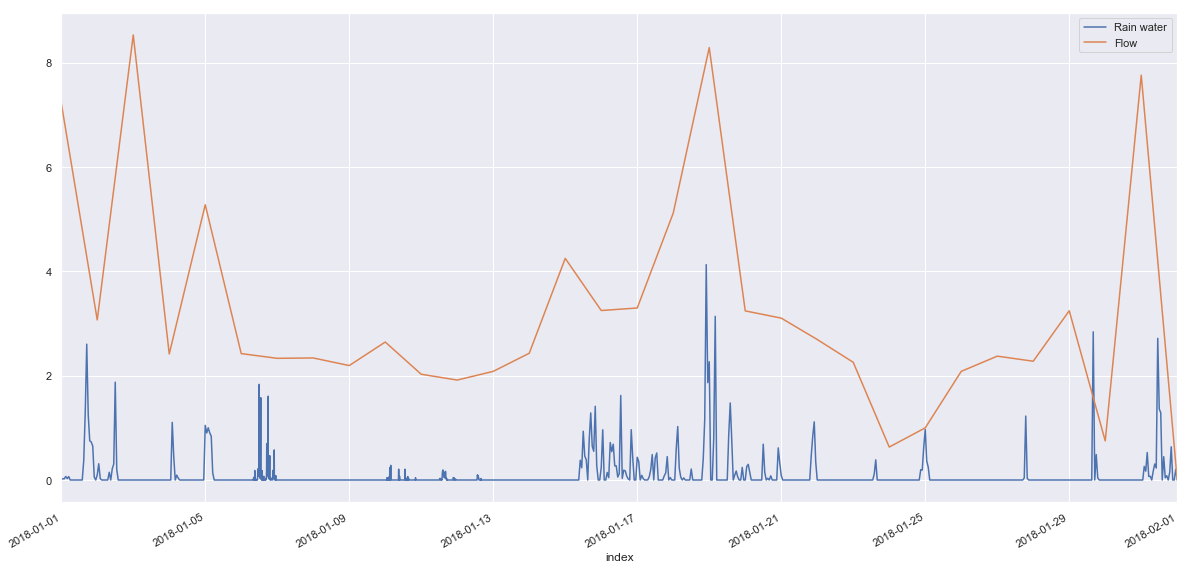

In [117]:
rain_one_month = raindata_bok_clean['2018-01-01 00:00:00' :'2018-02-01 00:00:00']
pump_bok_one_month = pump_bok_clean['2018-01-01 00:00:00' :'2018-02-01 00:00:00']
daily_flow_one_month = pump_bok_one_month['hstWaarde'].resample('D').mean()
ax = rain_one_month['Bokhoven'].plot()
daily_flow_one_month.plot(ax=ax)
ax.legend(['Rain water', 'Flow'])

## open knmi en match het op de echte gemete data
## hoe betrouwbaar is de voorspelling
## voor iedere locatie kijken en linken naar de pomp